# 識別対象のサンプルデータ
架空のデータを使って２項識別器の例を見ていきます。

ここで使うデータは架空のデータですが、ベースは[都道府県別統計とランキングで見る県民性-東西対立型ランキング](http://todo-ran.com/t/type/1) から持ってきたデータを加工して作ったものです。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
with open('data.csv', encoding="utf-8") as f:
    print(f.read())

﻿都道府県,納豆消費量,平均気温,東西ラベル
北海道,3772 ,8.9,1
岩手県,5406 ,10.2,1
青森県,4789 ,10.4,1
山形県,5308 ,11.7,1
秋田県,4604 ,11.7,1
長野県,4458 ,11.9,1
宮城県,4884 ,12.4,1
福島県,5606 ,13,1
茨城県,5496 ,13.6,1
栃木県,4665 ,13.8,1
新潟県,4233 ,13.9,1
富山県,4019 ,14.1,1
福井県,3348 ,14.5,1
群馬県,5348 ,14.6,1
石川県,3577 ,14.6,1
山梨県,4396 ,14.7,1
滋賀県,2813 ,14.7,0
鳥取県,2808 ,14.9,0
島根県,2811 ,14.9,0
奈良県,2587 ,14.9,0
埼玉県,4291 ,15,1
千葉県,4226 ,15.4,1
愛知県,3359 ,15.8,1
岐阜県,3512 ,15.8,1
神奈川県,3856 ,15.8,1
京都府,2849 ,15.9,0
三重県,3053 ,15.9,0
岡山県,2455 ,16.2,0
広島県,2945 ,16.3,0
香川県,2446 ,16.3,0
東京都,3808 ,16.3,1
大分県,2566 ,16.4,0
愛媛県,2657 ,16.5,0
佐賀県,2735 ,16.5,0
静岡県,3597 ,16.5,1
徳島県,2152 ,16.6,0
山口県,2777 ,16.7,0
兵庫県,2485 ,16.7,0
和歌山県,1815 ,16.7,0
熊本県,2883 ,16.9,0
大阪府,2231 ,16.9,0
高知県,2254 ,17,0
福岡県,3296 ,17,0
長崎県,2941 ,17.2,0
宮崎県,3061 ,17.4,0
鹿児島県,3454 ,18.6,0
沖縄県,2573 ,23.1,0
なぞの地点1,2000 ,10,0
なぞの地点2,4150 ,20,1
なぞの地点3,4300 ,22,0


In [6]:
data = pd.read_csv("data.csv", delimiter=",", encoding="utf-8")  # header がない場合は header=None

In [8]:
X=data[['平均気温','納豆消費量']]
y=data['東西ラベル']

In [9]:
X.head(8)  # 上から8個表示 


,平均気温,納豆消費量
0,8.9,3772
1,10.2,5406
2,10.4,4789
3,11.7,5308
4,11.7,4604
5,11.9,4458
6,12.4,4884
7,13.0,5606


# 元のデータのプロット


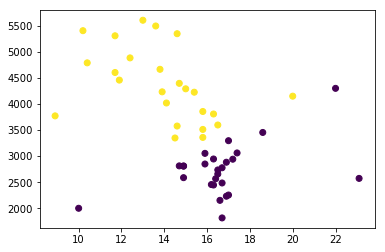

In [11]:
plt.scatter(X['平均気温'],X['納豆消費量'],c=y,s=36)
plt.show()

# 標準化と正規化
平均気温と納豆消費量では分布の幅が違いすぎる。識別器によっては両者の粒度を合わせないとまったくうまくいかない。

In [12]:
# 標準化
sc = StandardScaler()
data_std = sc.fit_transform(X)
 
# 正規化
ms = MinMaxScaler()
data_norm = ms.fit_transform(X)

# 標準化
平均が０，標準偏差が１となるように線形変換を施す。

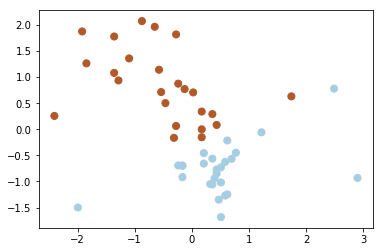

In [13]:
# matplotlibの準備
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired) # 色設定

plt.scatter(data_std[:,0],data_std[:,1],c=y,s=50)
plt.show()

# 正規化
データが０〜１の範囲になるように線形変換をほどこす。

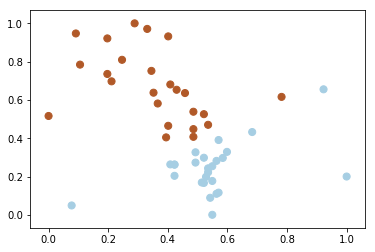

In [14]:
plt.scatter(data_norm[:,0],data_norm[:,1],c=y,s=50)
plt.show()

In [15]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, n_neighbors=1):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not

    if boundary:
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=[0])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

# 最近傍識別(k-nn で n=1)
未知のデータの識別結果＝既知のデータで、最も近いデータと同じ結果

In [16]:
from sklearn import neighbors

# 識別オブジェクト作成
clf = neighbors.KNeighborsClassifier(n_neighbors=1)

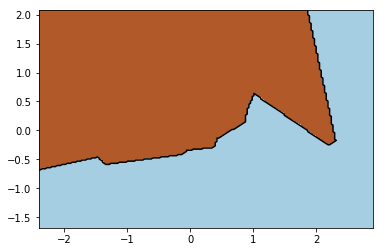

In [17]:
clf.fit(data_std, y) # 　　標準化データを用いて学習

plt.scatter(data_std[:, 0], data_std[:,1], marker='o', s=50, c=y)

plotBoundary(data_std, clf) # 境界線の描画

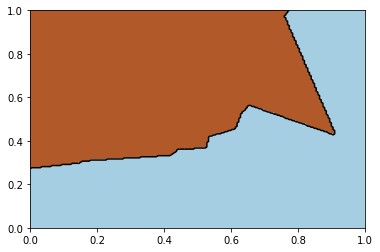

In [18]:
clf.fit(data_norm, y) # 正規化データを用いて学習

plt.scatter(data_norm[:, 0], data_norm[:,1], marker='o', s=50, c=y)

plotBoundary(data_norm, clf) # 境界線の描画

# k-最近傍識別
k=3 、すなわち、最も近い既知データを３つ選びそれらの多数決で判定結果を決定

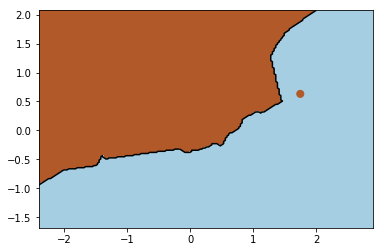

In [19]:
# 識別オブジェクト作成
clf = neighbors.KNeighborsClassifier(n_neighbors=3)
clf.fit(data_std, y) # 正規化データを用いて学習
plt.scatter(data_std[:, 0], data_std[:,1], marker='o', s=50, c=y)
plotBoundary(data_std, clf) # 境界線の描画

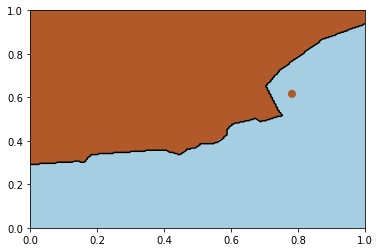

In [20]:
clf.fit(data_norm, y) # 正規化データを用いて学習
plt.scatter(data_norm[:, 0], data_norm[:,1], marker='o', s=50, c=y)
plotBoundary(data_norm, clf) # 境界線の描画

# ロジスティック回帰
単純パーセプトロンで特性関数をロジスティック関数に設定したもの

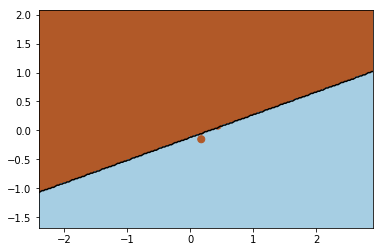

In [21]:
# モジュールの準備
from sklearn import linear_model
# オブジェクト作成
clf = linear_model.LogisticRegression()
clf.fit(data_std, y) # 正規化データを用いて学習
plt.scatter(data_std[:, 0], data_std[:,1], marker='o', s=50, c=y)
plotBoundary(data_std, clf) # 境界線の描画

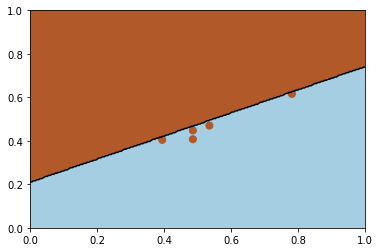

In [22]:
clf.fit(data_norm, y) # 正規化データを用いて学習
plt.scatter(data_norm[:, 0], data_norm[:,1], marker='o', s=50, c=y)
plotBoundary(data_norm, clf) # 境界線の描画

ロジスティック回帰は見ての通り、線型識別である。

# 線型SVM （サポートベクターマシン）

データをまっすぐなひとつの識別面（線）だけで分離するという点ではロジスティック回帰と同じだが、識別面と両クラスのデータのマージンが最大になるように識別面を最適化する。
<img src ="https://camo.qiitausercontent.com/3b09b1e5b79149434df411160f07ccfde4dd70eb/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f33343732312f38333530323330312d346435302d386165612d643266322d3339633232613933616166392e706e67" width=300>
[線型SVM](https://qiita.com/rennnosuke/items/cd01aa855196340167df)


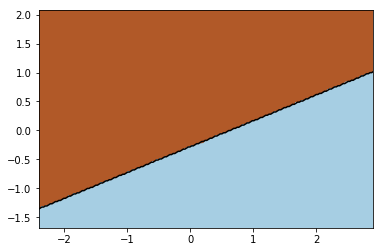

In [23]:
# モジュールの準備
from sklearn import svm
# オブジェクト作成
clf = svm.LinearSVC(C=1)
clf.fit(data_std, y) # 正規化データを用いて学習
plt.scatter(data_std[:, 0], data_std[:,1], marker='o', s=50, c=y)
plotBoundary(data_std, clf) # 境界線の描画

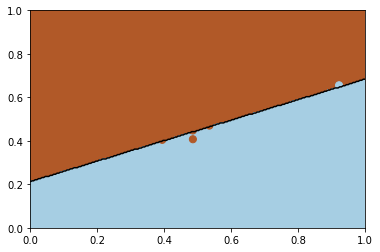

In [24]:
clf.fit(data_norm, y) # 正規化データを用いて学習
plt.scatter(data_norm[:, 0], data_norm[:,1], marker='o', s=50, c=y)
plotBoundary(data_norm, clf) # 境界線の描画

上の図で、識別面の両側にある色の違う点は、そのようなデータは誤認識してしまうことを意味する。

これは SVMのアルゴリズムがある程度の誤認識の許容度の範囲でデータ全体でのマージンを最大化するというアルゴリズムだからである。

<img src ="https://goo.gl/i7skbi" width=300>

scikit-learn の 線型SVMはパラメータ設定で許容度を変更することもできる。

> clf = svm.LinearSVC(C=1)

Cはエラーに対するペナルティの大きさを意味し、デフォルトは１である。ためしに、C=100でやってみよう。

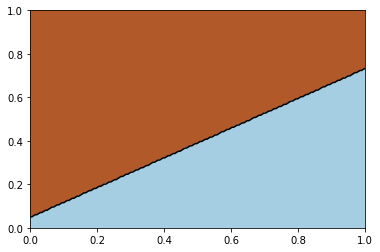

In [25]:
clf = svm.LinearSVC(C=100)
clf.fit(data_norm, y) # 正規化データを用いて学習
plt.scatter(data_norm[:, 0], data_norm[:,1], marker='o', s=50, c=y)
plotBoundary(data_norm, clf) # 境界線の描画

# 非線形SVM

なるべく多くのマージンを確保するという基本的なアイデアはそのままに、識別面として曲面を許すように拡張した SVM

> clf = svm.SVC(kernel='rbf', C=1.)

kernel というパラメータで、識別面の種類を指定する。

- 'linear’  平面（LinearSVCとおなじになる）
- ‘poly’ 多項式面
- ‘rbf’ ガウシアン関数　　sklearn のデフォルト
- ‘sigmoid’　シグモイド関数

参考

- [Support Vector Machines](http://scikit-learn.org/stable/modules/svm.html)
- [非線形SVM](https://qiita.com/rennnosuke/items/fab837825b64bf50be56)


In [26]:
# モジュールの準備
from sklearn import svm
# オブジェクト作成
clf = svm.SVC(kernel='rbf')

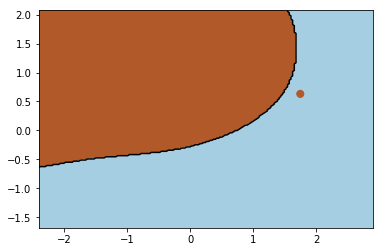

In [27]:
clf.fit(data_std, y) # 正規化データを用いて学習
plt.scatter(data_std[:, 0], data_std[:,1], marker='o', s=50, c=y)
plotBoundary(data_std, clf) # 境界線の描画

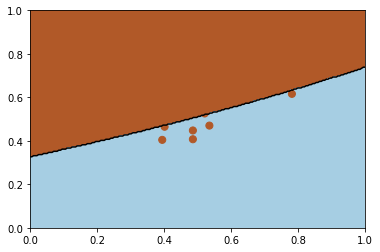

In [28]:
clf.fit(data_norm, y) # 正規化データを用いて学習
plt.scatter(data_norm[:, 0], data_norm[:,1], marker='o', s=50, c=y)
plotBoundary(data_norm, clf) # 境界線の描画

はみ出るデータが多いのでペナルティ項を大きくしてみる

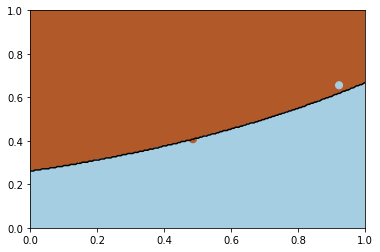

In [29]:
clf = svm.SVC(kernel='rbf', C=10)
clf.fit(data_norm, y) # 正規化データを用いて学習
plt.scatter(data_norm[:, 0], data_norm[:,1], marker='o', s=50, c=y)
plotBoundary(data_norm, clf) # 境界線の描画

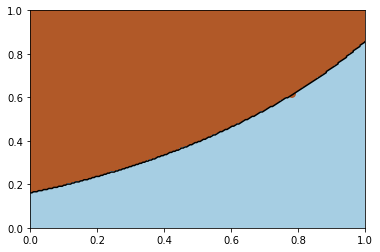

In [30]:
clf = svm.SVC(kernel='rbf', C=30)
clf.fit(data_norm, y) # 正規化データを用いて学習
plt.scatter(data_norm[:, 0], data_norm[:,1], marker='o', s=50, c=y)
plotBoundary(data_norm, clf) # 境界線の描画

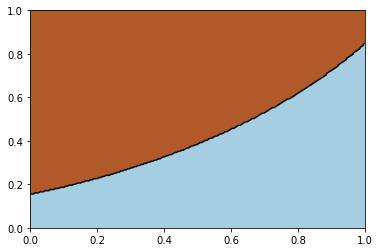

In [31]:
clf = svm.SVC(kernel='rbf', C=35)
clf.fit(data_norm, y) # 正規化データを用いて学習
plt.scatter(data_norm[:, 0], data_norm[:,1], marker='o', s=50, c=y)
plotBoundary(data_norm, clf) # 境界線の描画